In [ ]:
import pandas as pd
comic_con = pd.read_csv('/content/comic_con.csv')
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [ ]:
# normalize data for clustering
from scipy.cluster.vq import whiten

# Use the whiten() function to standardize the data
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

In [ ]:
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled,cluster_labels
0,17,4,0.509349,0.090010,2
1,20,6,0.599234,0.135015,2
2,35,0,1.048660,0.000000,2
3,14,0,0.419464,0.000000,2
4,37,4,1.108583,0.090010,2


### Matplotlib

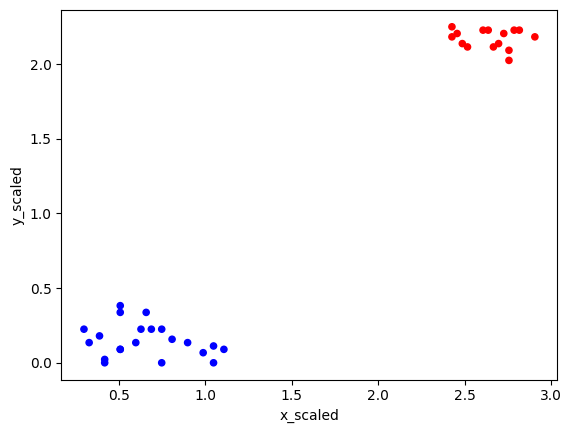

In [ ]:
# Import the pyplot class
import matplotlib.pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled',
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x] ))
plt.show()

### Seaborn

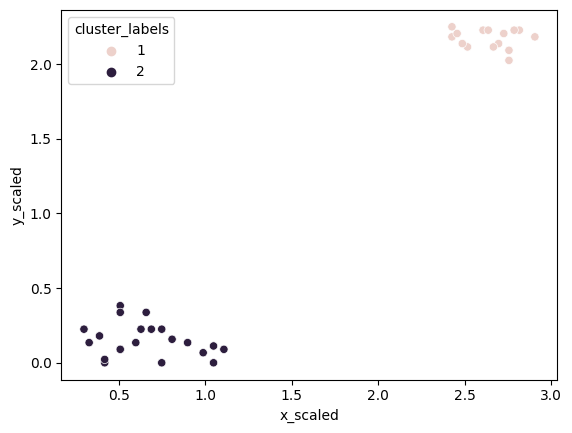

In [ ]:
# Import the seaborn module
import seaborn as sns

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()